# Boreal polar map of ecotone

In [2]:
#library(aws.s3)
library(raster)
library(tidyverse)
library(dplyr)
library(grid)
library(gridExtra)
library(RColorBrewer)
library(data.table)

library(fs)
library(sf)
library(rgdal)

#library(rgeos)
library(mapproj)
#library(rgee)
library(viridis)
#library(wesanderson)
library(scales)
library(tools)
#library(patchwork)

library(rnaturalearth)
library(rnaturalearthdata)

#conda install -c conda-forge r-rnaturalearth r-rnaturalearthdata r-mapproj r-rgeos r-viridis r-wesanderson r-patchwork r-aws.s3 r-feather r-rockchalk

Loading required package: maps

Attaching package: ‘maps’

The following object is masked from ‘package:viridis’:

    unemp

The following object is masked from ‘package:purrr’:

    map



In [48]:
source('/home/pmontesa/code/3dsi/boreal_map_functions.R') 

[1] "ADAPT, EXPLORE"
[1] "ADAPT, EXPLORE"


## Map showing boreal tile extent

In [49]:
ext = extent(-180,180,40,90)

In [52]:
if(MAAP){ root_prj = '/projects/my-public-bucket/databank/'}
if(ADAPT){ root_prj = '/explore/nobackup/people/pmontesa/userfs02/projects/ilab/boreal_height_cmip/'}

ecotone_fn = paste0(root_prj, 'hydrobasins_L08_patterns_tte.gpkg')
ecotone_fn = paste0(root_prj, 'hydrobasins_L08_patterns_tte_boreal_tundra.gpkg')
study_domain_fn = paste0(root_prj, 'boreal_height_cmip_extent_polygons.gpkg')

In [53]:
options(warn=-1)

study_domain = shp_fort_join(study_domain_fn, ext, REPROJECT=FALSE, CROP=FALSE)

[1] "Using sf and coercing to Spatial object..."
Reading layer `boreal_height_cmip_extent_polygons' from data source `/panfs/ccds02/nobackup/people/pmontesa/userfs02/projects/ilab/boreal_height_cmip/boreal_height_cmip_extent_polygons.gpkg' using driver `GPKG'
Simple feature collection with 47 features and 3 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -168.1318 ymin: 44.21279 xmax: -54.29206 ymax: 71.99637
Geodetic CRS:  WGS 84


Regions defined for each Polygons


In [54]:
options(warn=-1)

ecotone = shp_fort_join(ecotone_fn, ext, REPROJECT=FALSE, CROP=FALSE)

[1] "Using sf and coercing to Spatial object..."
Reading layer `hydrobasins_L08_patterns_tte_boreal_tundra' from data source `/panfs/ccds02/nobackup/people/pmontesa/userfs02/projects/ilab/boreal_height_cmip/hydrobasins_L08_patterns_tte_boreal_tundra.gpkg' using driver `GPKG'
Simple feature collection with 23165 features and 2 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -167.8668 ymin: 43.2 xmax: -52.61605 ymax: 70.25898
Geodetic CRS:  WGS 84


Regions defined for each Polygons


In [55]:
ecotone = ecotone %>% mutate(pattern_class = factor(pattern_class))
head(ecotone)

long,lat,order,hole,piece,id,group,HYBAS_ID,pattern_class
-79.73817,51.33540,1,FALSE,1,1,1.1,7080024740,TTE diffuse
-79.73664,51.35443,2,FALSE,1,1,1.1,7080024740,TTE diffuse
-79.73041,51.35007,3,FALSE,1,1,1.1,7080024740,TTE diffuse
-79.72435,51.35788,4,FALSE,1,1,1.1,7080024740,TTE diffuse
-79.72565,51.36044,5,FALSE,1,1,1.1,7080024740,TTE diffuse
-79.73337,51.36955,6,FALSE,1,1,1.1,7080024740,TTE diffuse


In [56]:

# COLOR_DICT = c('#00441b', 'red', 'dark red', 'light green', 'green','black')
# names(COLOR_DICT) = levels(ecotone$pattern_class)
# COLOR_DICT

In [57]:
levels(ecotone$pattern_class) 

[1] "boreal"            "TTE abrupt"        "TTE abrupt (edge)"
[4] "TTE diffuse"       "TTE uniform"       "tundra"

In [84]:
#COLOR_DICT = c('boreal'='#00441b', 'TTE abrupt'='red', 'TTE abrupt (edge)'='dark red', 'TTE diffuse'='light green', 'TTE uniform'='green','tundra'='black')
GRADIENT_CLASSES_RENAMED = c('Boreal Forest\n(taiga)', "TTE\n(abrupt)", 'TTE\n(abrupt edge)',  "TTE\n(diffuse)", 'TTE\n(uniform)', 'Non-forest\n(tundra)')
ecotone$pattern_class_adj <- factor(ecotone$pattern_class)#, levels = GRADIENT_CLASSES_RENAMED)
levels(ecotone$pattern_class_adj) = GRADIENT_CLASSES_RENAMED
pattern_class_colors <- c('#00441b', viridis::plasma(n = 4), '#969696')
names(pattern_class_colors) <- levels(ecotone$pattern_class_adj)
name_landscape_patterns = "Landscape pattern class"   #"Taiga-tundra ecotone\nlandscape pattern class"
scale_color_landscape_pattern_class <- scale_colour_manual(values = pattern_class_colors, name = name_landscape_patterns)
scale_fill_landscape_pattern_class <- scale_fill_manual(values = pattern_class_colors, name = name_landscape_patterns)

In [85]:
# Re-order factor levels
ecotone$pattern_class_adj <- factor(ecotone$pattern_class_adj,
                levels = c(GRADIENT_CLASSES_RENAMED[1], rev(GRADIENT_CLASSES_RENAMED[4:5]), GRADIENT_CLASSES_RENAMED[2:3],  GRADIENT_CLASSES_RENAMED[6]))
levels(ecotone$pattern_class_adj) 

[1] "Boreal Forest\n(taiga)" "TTE\n(uniform)"         "TTE\n(diffuse)"        
[4] "TTE\n(abrupt)"          "TTE\n(abrupt edge)"     "Non-forest\n(tundra)"

In [86]:
head(ecotone)

long,lat,order,hole,piece,id,group,HYBAS_ID,pattern_class,pattern_class_adj
-79.73817,51.33540,1,FALSE,1,1,1.1,7080024740,TTE diffuse,TTE (diffuse)
-79.73664,51.35443,2,FALSE,1,1,1.1,7080024740,TTE diffuse,TTE (diffuse)
-79.73041,51.35007,3,FALSE,1,1,1.1,7080024740,TTE diffuse,TTE (diffuse)
-79.72435,51.35788,4,FALSE,1,1,1.1,7080024740,TTE diffuse,TTE (diffuse)
-79.72565,51.36044,5,FALSE,1,1,1.1,7080024740,TTE diffuse,TTE (diffuse)
-79.73337,51.36955,6,FALSE,1,1,1.1,7080024740,TTE diffuse,TTE (diffuse)


[1] "Using sf and coercing to Spatial object..."
Reading layer `wwf_circumboreal_Dissolve' from data source `/panfs/ccds02/nobackup/people/pmontesa/userfs02/arc/wwf_circumboreal_Dissolve.shp' using driver `ESRI Shapefile'
Simple feature collection with 2 features and 4 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -5281040 ymin: -60527.9 xmax: 3959203 ymax: 8747447
Projected CRS: NAD83 / Alaska Albers


Regions defined for each Polygons
Regions defined for each Polygons
Regions defined for each Polygons


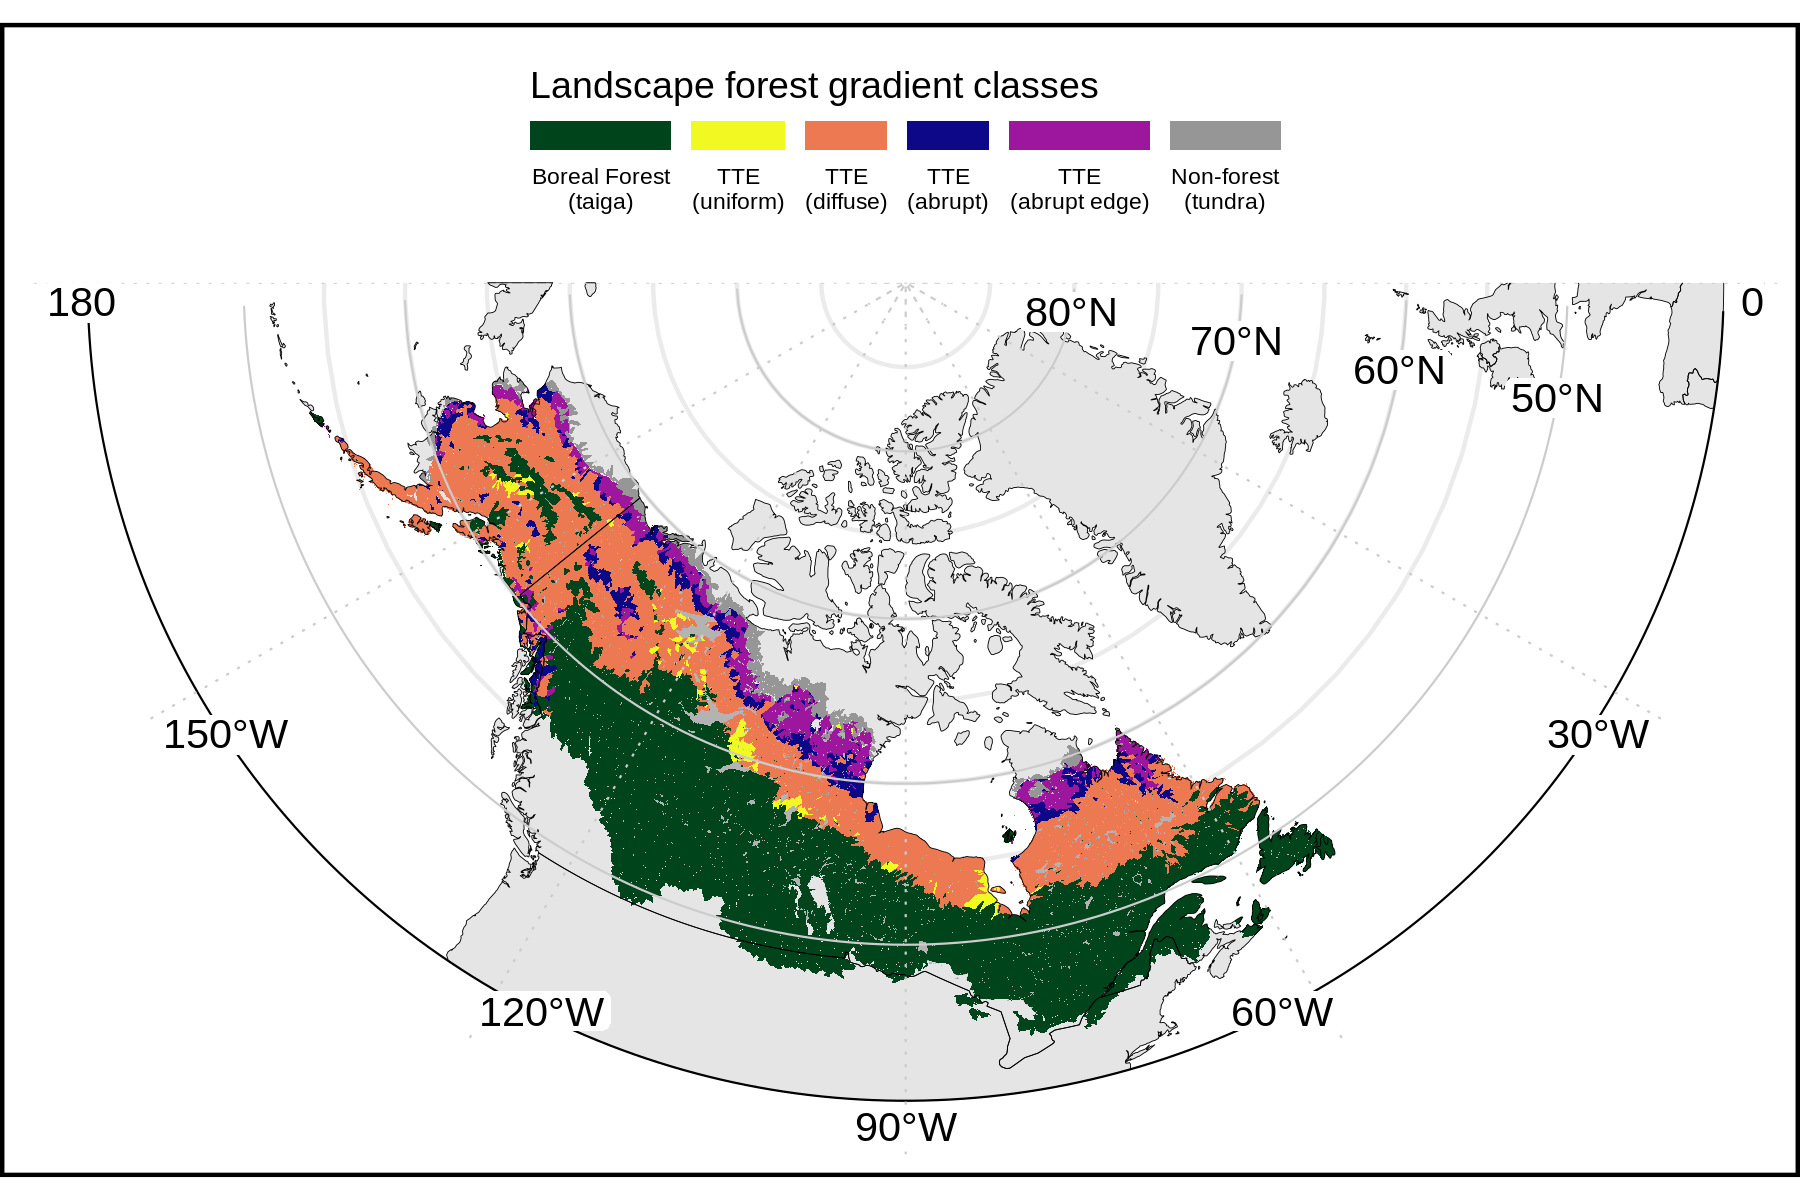

In [83]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 300)

m_groups = DO_MAP_BOREAL_SP(MAP_EXTENT=ext, rotate_map=270, xlim=c(-170,-10), ylim=c(ext[3]-1, 90), 
                     BOREAL_SHP_FN = wwf_circ_dis_fn
                    ,LAYER_LIST = list(geom_polygon(data = sample_frac(ecotone, 0.5), aes(x = long, y = lat, group = group, fill=pattern_class_adj), size=0.1)) #, fill=NA
                    ) + 
    theme(legend.text=element_text(size=rel(0.5))) +
    #scale_color_brewer(palette = 'Set2') +
    #scale_fill_viridis_d() +
    #scale_fill_manual( values = COLOR_DICT) +
    scale_fill_landscape_pattern_class +
    guides(fill=guide_legend(title="Landscape forest gradient classes", title.position = "top", label.position = "bottom", legend.position = "bottom", keywidth = unit(.25, "cm"), keyheight = unit(.25, "cm"), nrow=1)) +
    theme(plot.background = element_rect(fill = NA, colour = 'black', size = 1))
m_groups

In [130]:
study_domain$height_class_adj = factor(study_domain$height_class)
levels(study_domain$height_class_adj) = c('Main prediction domain', 'Extended training domain')
tail(study_domain)

,long,lat,order,hole,piece,id,group,level_0,level_1,height_class,height_class_adj
,<dbl>,<dbl>,<int>,<lgl>,<fct>,<chr>,<fct>,<dbl>,<dbl>,<chr>,<fct>
45059,-92.09521,69.62174,3,FALSE,1,47,47.1,1,31,h_can to 0,Extended training domain
45060,-92.09449,69.62081,4,FALSE,1,47,47.1,1,31,h_can to 0,Extended training domain
45061,-92.12474,69.61327,5,FALSE,1,47,47.1,1,31,h_can to 0,Extended training domain
45062,-92.13106,69.61275,6,FALSE,1,47,47.1,1,31,h_can to 0,Extended training domain
45063,-92.14072,69.61425,7,FALSE,1,47,47.1,1,31,h_can to 0,Extended training domain
45064,-92.17467,69.62340,8,FALSE,1,47,47.1,1,31,h_can to 0,Extended training domain


[1] "Using sf and coercing to Spatial object..."
Reading layer `wwf_circumboreal_Dissolve' from data source 
  `/projects/my-public-bucket/databank/arc/wwf_circumboreal_Dissolve.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 2 features and 4 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -5281040 ymin: -60527.9 xmax: 3959203 ymax: 8747447
Projected CRS: NAD83 / Alaska Albers


Regions defined for each Polygons

Regions defined for each Polygons

Regions defined for each Polygons



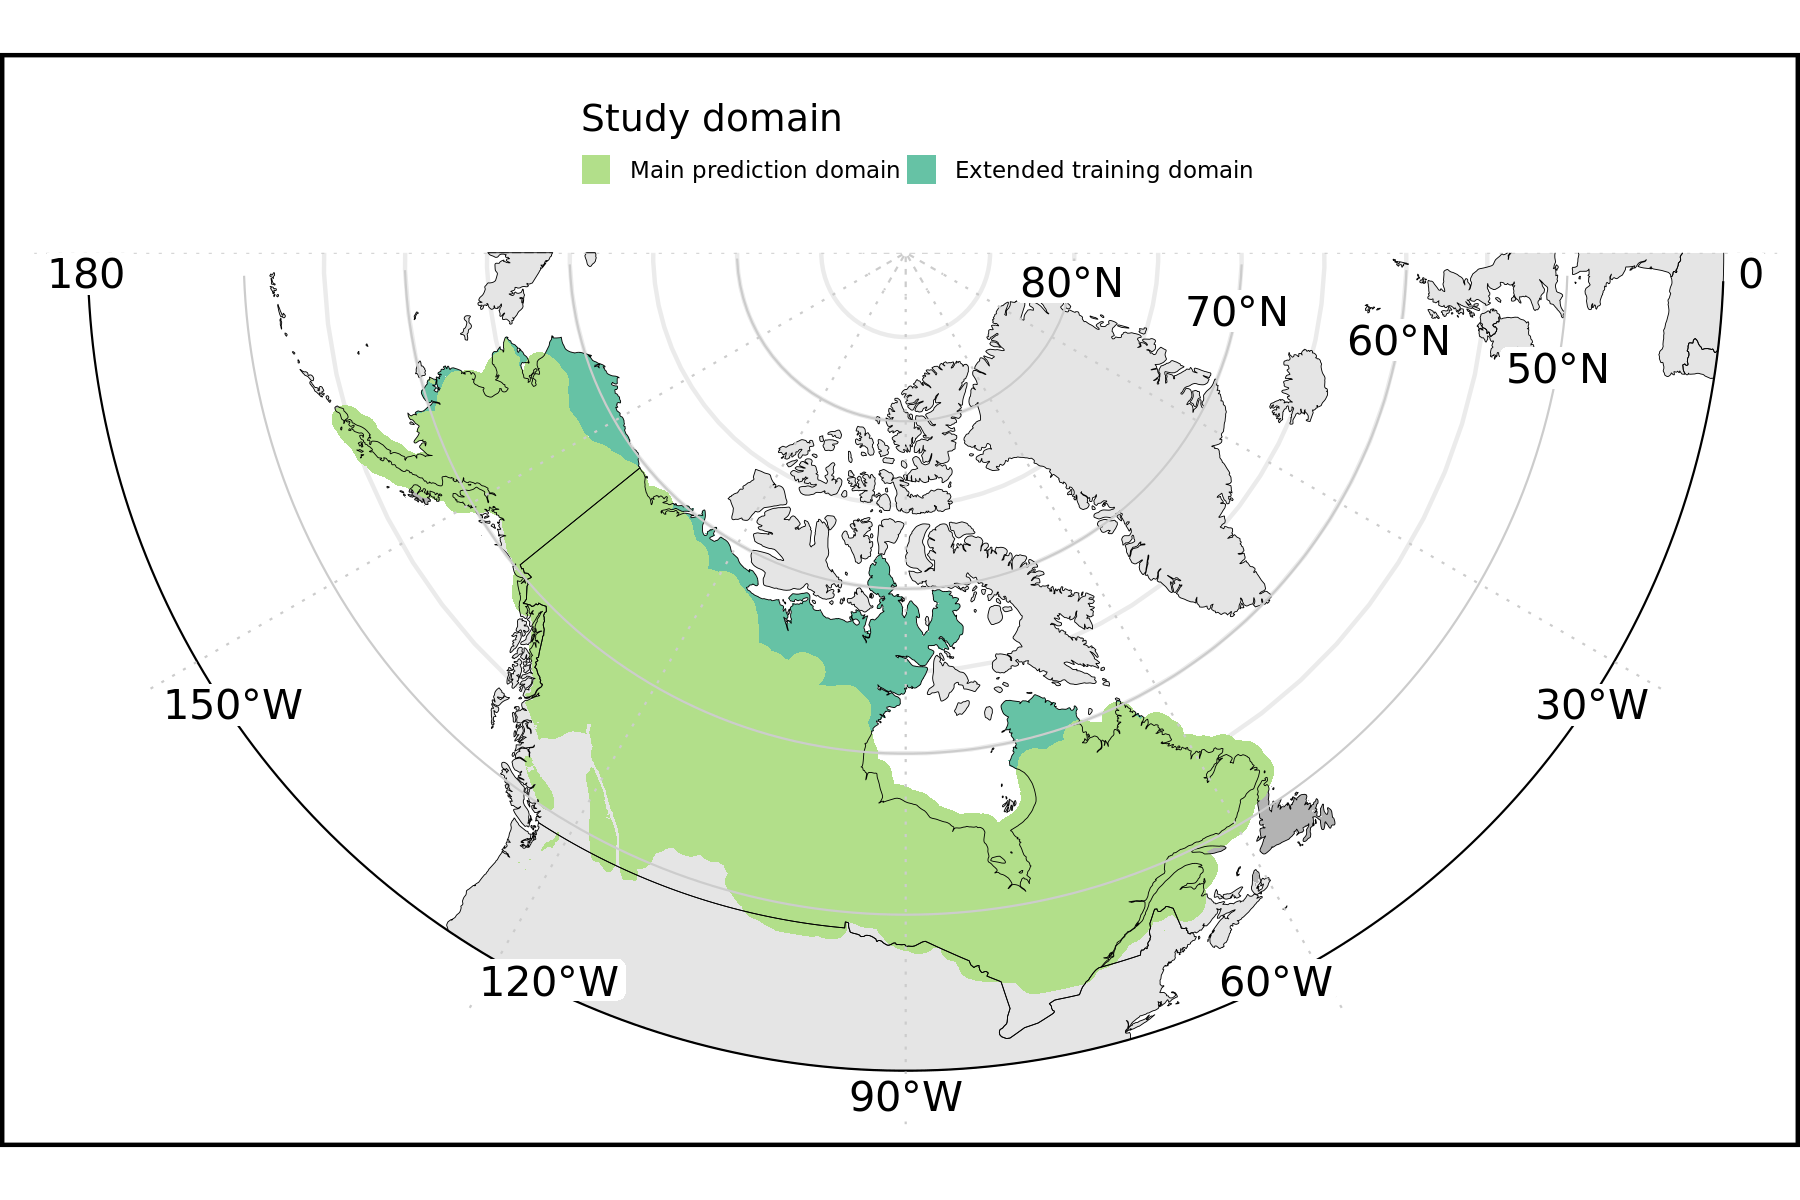

In [145]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 300)

m_groups = DO_MAP_BOREAL_SP(MAP_EXTENT=ext, rotate_map=270, xlim=c(-170,-10), ylim=c(ext[3]-1, 90), 
                     BOREAL_SHP_FN = wwf_circ_dis_fn
                    ,LAYER_LIST = list(geom_polygon(data = study_domain , aes(x = long, y = lat, group = group, fill=height_class_adj), size=0.1)
                                       
                                      )
                            
                    ) + 
    theme(legend.text=element_text(size=rel(0.5))) +
    #scale_fill_viridis_d(guide=FALSE, alpha=0.25) +
    scale_fill_manual( values = alpha(c('#b2df8a', '#66c2a5'), 1)) + 
     theme(plot.background = element_rect(fill = NA, colour = 'black', size = 1)) +
    guides(fill=guide_legend(title="Study domain", title.position = "top", label.position = "right", legend.position = "bottom", keywidth = unit(.25, "cm"), keyheight = unit(.25, "cm"), nrow=1))




m_groups 

## Map ATL08 used to grid and train model

In [18]:
atl08_path = "/explore/nobackup/people/pmontesa/userfs02/projects/ilab/boreal_height_cmip/atl08_boreal_na_20m_intersect_filt_2020_2020.gpkg"

In [19]:
#atl08_df = sample_fast_read(atl08_path) #'/projects/my-public-bucket/databank/boreal_height_cmip6/atl08_filt_20m.parquet'

In [36]:
atl08_df = sample_frac(st_read(atl08_path), 0.25) %>% 
            mutate(ht_can_20m_train = case_when(height_class == 'h_can' ~ h_can_20m,
                                         height_class == 'h_can to 0' ~ 0,
                                         TRUE ~ NA_real_))

Reading layer `atl08_boreal_na_20m_intersect_filt_2020_2020' from data source `/panfs/ccds02/nobackup/people/pmontesa/userfs02/projects/ilab/boreal_height_cmip/atl08_boreal_na_20m_intersect_filt_2020_2020.gpkg' using driver `GPKG'
Simple feature collection with 7361111 features and 25 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -167.9883 ymin: 44.21282 xmax: -55.37529 ymax: 71.78214
Geodetic CRS:  WGS 84


In [33]:
# atl08_df = atl08_df %>% 
#         mutate(ht_can_20m_train = case_when(height_class == 'h_can' ~ h_can_20m,
#                                          height_class == 'h_can to 0' ~ 0,
#                                          TRUE ~ NA_real_))

In [37]:
head(atl08_df)

id_unique,lon,lat,h_can_20m,lon_100m,lat_100m,h_can,h_max_can,h_te_best,rh25,geom,...,seg_cover,sol_el,dt,granule_name,y,m,doy,height_class,geom,ht_can_20m_train
99W1269070-54N5370250-202076-2,-99.12688,54.53720,6.848526,-99.12691,54.53703,6.777054,6.848526,227.9623,1.4682922,POINT (-99.12688 54.5372),...,94,-6.62819576,b'2020-07-06T04:22:02.000000Z',ATL08_20200706041332_01650806_005_01.h5,2020,7,188,h_can,POINT (-99.12688 54.5372),6.848526
65W6065130-54N6348260-2020716-2,-65.60648,54.63501,7.619690,-65.60651,54.63483,9.734711,10.598572,492.5413,1.0147400,POINT (-65.60648 54.63501),...,85,-5.20263004,b'2020-07-16T01:39:52.000000Z',ATL08_20200716013122_03160806_005_01.h5,2020,7,198,h_can,POINT (-65.60648 54.63501),7.619690
69W2240370-53N1837340-202073-4,-69.22407,53.18356,3.583862,-69.22404,53.18373,5.541382,7.250244,573.3961,0.7244263,POINT (-69.22407 53.18356),...,88,-8.21697712,b'2020-07-03T02:30:29.000000Z',ATL08_20200703022159_01180806_005_01.h5,2020,7,185,h_can,POINT (-69.22407 53.18356),3.583862
111W875999-58N9506950-2020814-2,-111.87597,58.95087,9.078384,-111.87600,58.95070,8.635040,9.078384,182.4019,3.2619934,POINT (-111.876 58.95087),...,80,0.07957399,b'2020-08-14T03:24:29.000000Z',ATL08_20200814031559_07600806_005_01.h5,2020,8,227,h_can,POINT (-111.876 58.95087),9.078384
73W1869960-57N3709250-2020727-5,-73.18707,57.37057,1.906281,-73.18700,57.37093,2.225006,2.280060,300.6866,0.6514282,POINT (-73.18707 57.37057),...,10,-2.13870120,b'2020-07-27T01:40:33.000000Z',ATL08_20200727013202_04840806_005_01.h5,2020,7,209,h_can,POINT (-73.18707 57.37057),1.906281
74W6062690-58N5535810-202084-4,-74.60631,58.55341,1.151566,-74.60627,58.55358,5.050751,5.189758,167.2756,0.8021393,POINT (-74.60631 58.55341),...,0,-0.72355163,b'2020-08-04T01:23:52.000000Z',ATL08_20200804011522_06060806_005_01.h5,2020,8,217,h_can,POINT (-74.60631 58.55341),1.151566


[1] "Using sf and coercing to Spatial object..."
Reading layer `wwf_circumboreal_Dissolve' from data source `/panfs/ccds02/nobackup/people/pmontesa/userfs02/arc/wwf_circumboreal_Dissolve.shp' using driver `ESRI Shapefile'
Simple feature collection with 2 features and 4 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -5281040 ymin: -60527.9 xmax: 3959203 ymax: 8747447
Projected CRS: NAD83 / Alaska Albers


Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum WGS_1984 in CRS definition,
 but +towgs84= values preserved”Regions defined for each Polygons
Regions defined for each Polygons
Regions defined for each Polygons


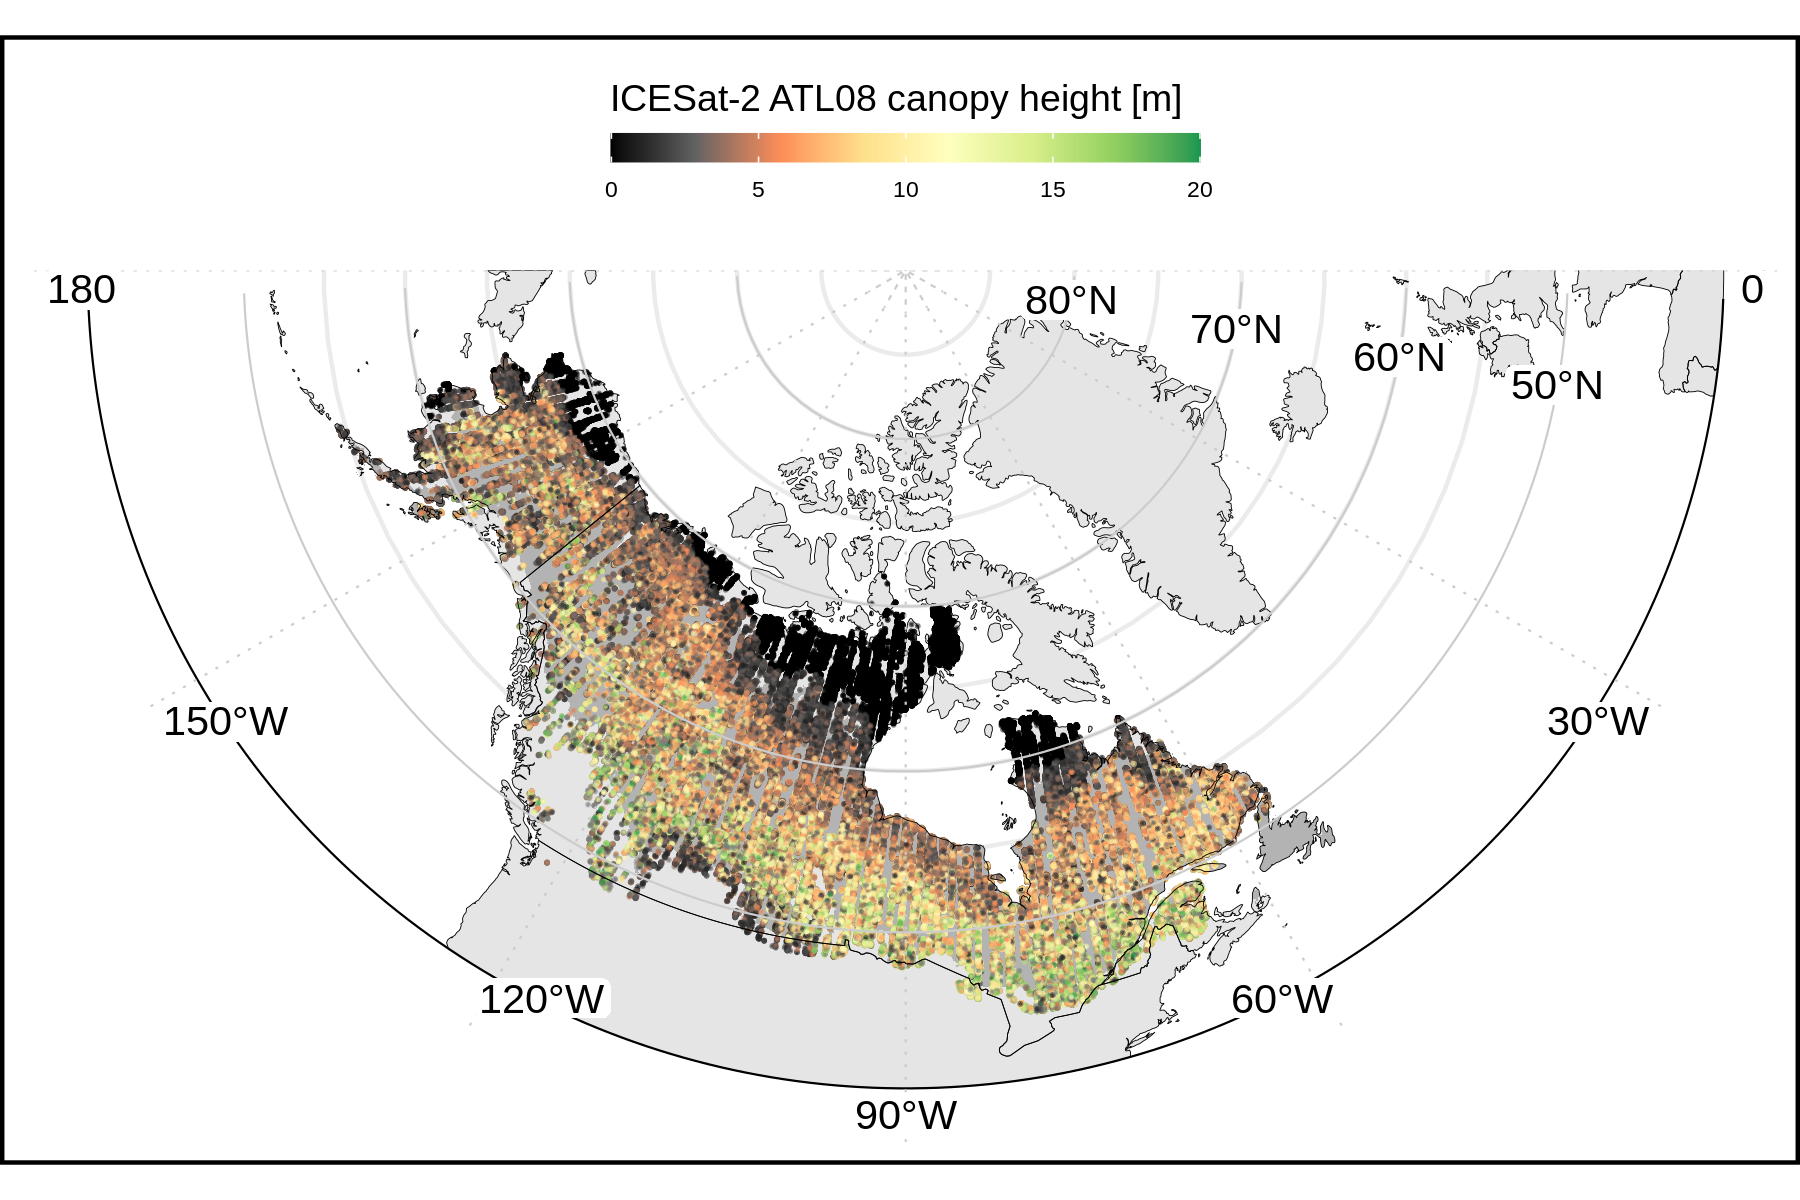

In [38]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 300)

pal_ht = c('black','#636363','#fc8d59','#fee08b','#ffffbf','#d9ef8b','#91cf60','#1a9850')

theme_and_labs = list(
    theme_classic(),
    theme(plot.subtitle=element_text(size=8, hjust=0.5, face="italic", color="black"))
    #,
    #labs(
        #title="Vegetation canopy heights",
        #subtitle = paste0("Filtered sample of ICESat-2 ATL08 30m observations of RH98 in the boreal forest"," for ",year_atl08),
         #caption = paste0("# obs: ", NUM_ATL08_OBS, "\n# obs (night): ", NUM_ATL08_NIGHT_OBS)
         #caption = paste0("# of filtered ICESat-2 ATL08 30m segment obs. from ", year_atl08,": ", NUM_ATL08_OBS)
    #)    
)
scale_color_h_can = scale_colour_gradientn( breaks=c(0,5,10,15, 20), limits = c(0, 20), colours = pal_ht)


var_ht = 'ht_can_20m_train'

map_height_layer_list = list(
    geom_point(data = atl08_df, aes_string(x = "lon", y = "lat", colour=var_ht), alpha=0.5, size = 0.00001),
    scale_color_h_can,
    theme_and_labs,
    guides(color=guide_colourbar(title="ICESat-2 ATL08 canopy height [m]", title.position = "top", label.position = "bottom", keywidth = unit(.5, "cm"), keyheight = unit(.25, "cm")))
  )

m_atl08 = DO_MAP_BOREAL_SP(MAP_EXTENT=ext, rotate_map=270, xlim=c(-170,-10), ylim=c(ext[3]-1, 90), 
                     BOREAL_SHP_FN = wwf_circ_dis_fn,
                     LAYER_LIST = map_height_layer_list                           
                    ) + 
    theme(legend.text=element_text(size=rel(0.5))) +
    #scale_fill_viridis_d(guide=FALSE, alpha=0.25) +
    #scale_fill_manual( values = alpha(c('#b2df8a', '#66c2a5'), 1)) + 
     theme(plot.background = element_rect(fill = NA, colour = 'black', size = 1)) +
    guides(fill=guide_legend(title="ICESat-2 ATL08", title.position = "top", label.position = "right", legend.position = "bottom", keywidth = unit(.25, "cm"), keyheight = unit(.25, "cm"), nrow=1))




m_atl08 